In [1]:
import os

In [2]:
%pwd

'c:\\Users\\HP\\Desktop\\InternshipAssignment\\research'

In [3]:
os.chdir('../')

In [4]:
%pwd

'c:\\Users\\HP\\Desktop\\InternshipAssignment'

In [5]:
import pandas as pd
import numpy as np

In [6]:
df = pd.read_csv(os.path.join("data_folder","test.csv"))

In [23]:
y = pd.read_csv(os.path.join("data_folder","test_label.csv"))

In [25]:
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

In [26]:
import shap

In [27]:
clf = IsolationForest()
clf.fit(df)
y_pred = clf.predict(df)

In [29]:
anomalies = df[y_pred == -1]

# Extract the features from anomalies
anomaly_features = anomalies.drop(columns=['1'])  # Adjust column name as needed


explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(anomaly_features)


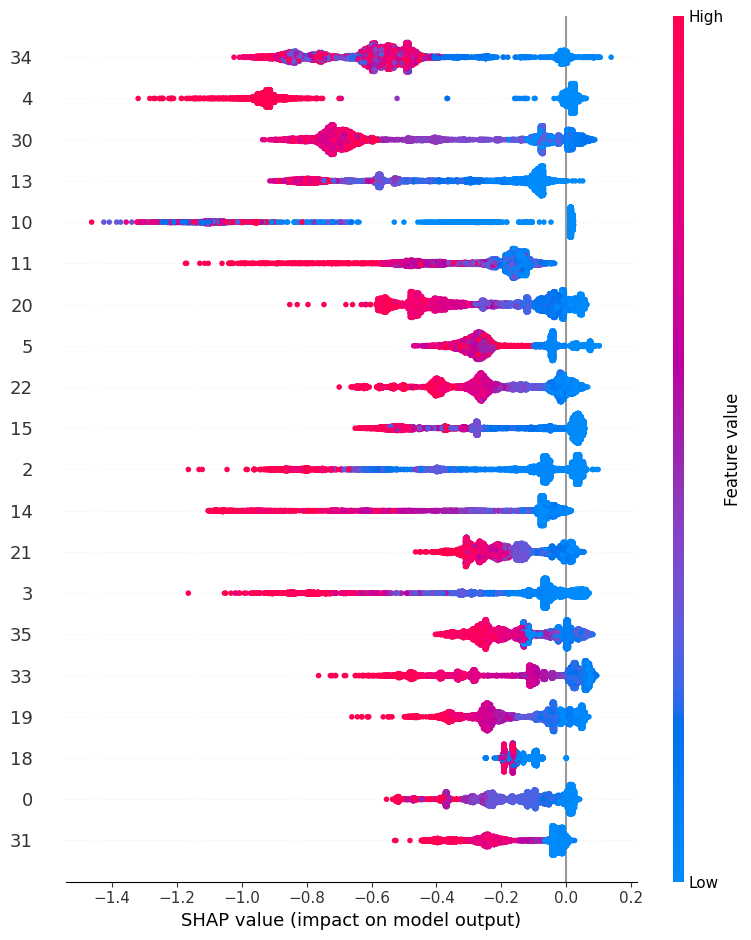

Top contributing features to anomalies:
34
4
30
13
10
11
20
5
22
15
2
14
21
3
35
33
19
18
0
31
7
23
25
24
6
12
26
32
28
9
36
16
17
29
27
8
37


In [30]:
shap.summary_plot(shap_values, anomaly_features)

# Identify features contributing to anomalies
top_features = anomaly_features.columns[np.argsort(-np.abs(shap_values).mean(0))]

# Print top contributing features
print("Top contributing features to anomalies:")
for feature in top_features:
    print(feature)

In [11]:
import numpy as np
index = np.where(prediction < 0)

In [12]:
index

(array([    1,    21,    51, ..., 68606, 68607, 68613], dtype=int64),)